In [1]:
from tensorflow.keras.datasets import mnist

In [6]:
(train_images, train_labels)=mnist.load_data()[0]
(test_images, test_labels)=mnist.load_data()[1]

In [8]:
print("shape of train images:",train_images.shape)
print("shape of test images:", test_images.shape)

shape of train images: (60000, 28, 28)
shape of test images: (10000, 28, 28)


In [11]:
import matplotlib.pyplot as plt

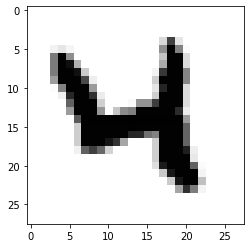

In [17]:
plt.imshow(train_images[20], cmap="gray_r")
plt.show()

# 3D--------> 4D
#keras 4 boyutlu verilerle çalıştığından elimizdeki verileri 4 boyutlu yapmamız lazım.
#burada shape fonskiyonunn 0. indeksi datasetimizde kaç adet resim olduğunu verir.
#1. ve 2. indeksler ise resmin boyutu, 3. indeks ise kaç kanallı olduğunu gösterir.

In [19]:
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)


print("shape of train images:",train_images.shape)
print("shape of test images:",test_images.shape)

shape of train images: (60000, 28, 28, 1)
shape of test images: (10000, 28, 28, 1)


# Normalization:
burada resimleri normalize etmemiz gerekiyor. Modeli tanımlamadan önce yapmamız gereken bir basamaktır.
normalize etmek için tüm resimleri 255'e bölebiliriz
Tüm resimler RGB formatında olduğu için 0-255 arasında değerler alırlar.
Normalizasyon işlemi sonucunda resimler 0 ile 1 arasında değerler alırlar.

In [22]:
train_images=train_images.astype("float32")
test_images=test_images.astype("float32")

train_images/=255
test_images/=255

# Modeli Tanımlama/ Creating Network


In [26]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D

In [30]:
input_shape=(28,28,1)

In [31]:
model=Sequential()

In [33]:
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))

In [34]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [35]:
model.add(Flatten())

In [36]:
model.add(Dense(128,activation="relu"))

In [37]:
model.add(Dropout(0.2))

In [38]:
model.add(Dense(10,activation="softmax"))

# Compiling Model


In [39]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                      

# Fitting Model/ Trained Model

In [41]:
history=model.fit(x=train_images,
                 y=train_labels,
                 epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.5655 - accuracy: 0.8303
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2215 - accuracy: 0.9341
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1599 - accuracy: 0.9517
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1332 - accuracy: 0.9603
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1146 - accuracy: 0.9656
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1023 - accuracy: 0.9682
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0929 - accuracy: 0.9713
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0866 - accuracy: 0.9733
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0804 - accuracy: 0.9748
Epoch 10/10
1875/1875 [==============================] - 21s 11m

# Evaluating Model


In [42]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels)
print("Test loss:",test_loss)
print("Test labels:",test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 10.9686 - accuracy: 0.9779
Test loss: 10.968647956848145
Test labels: [7 2 1 ... 4 5 6]


# Modeli Görselleştirme/ losss accuracy graph

In [45]:
history_dict=history.history
print("Keys:",history_dict.keys())

Keys: dict_keys(['loss', 'accuracy'])


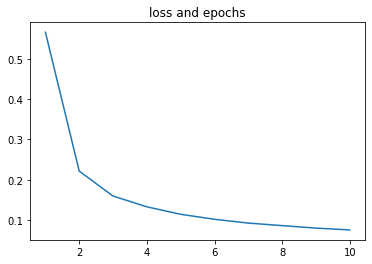

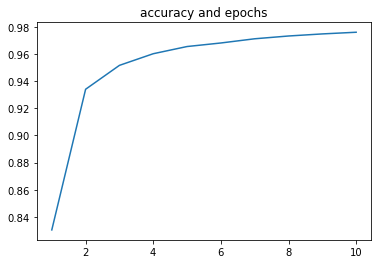

In [51]:
import matplotlib.pyplot as plt

epochs=range(1,11)

loss=history_dict["loss"]

accuracy=history_dict["accuracy"]

plt.plot(epochs, loss)

plt.title("loss and epochs")

plt.show()

plt.plot(epochs, accuracy)

plt.title("accuracy and epochs")

plt.show()

# saving model



In [52]:
model.save("mnist_model.h5")

# Loading Model and Prediction

In [57]:
from keras.models import load_model
import random

In [58]:
model=load_model("mnist_model.h5")

1/1 [==============================] - 0s 41ms/step
predicted number: 3


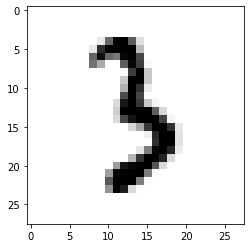

In [65]:
i=random.randint(1,500)
prediction=model.predict(test_images[i].reshape(1,28,28,1))
print("predicted number:",prediction.argmax())

plt.imshow(test_images[i].reshape(28,28),cmap="gray_r")
plt.show()

